# Notebook Model Digit recognizer

Ce notebook a pour but d'utiliser un model de CNN pour reconnaitre un chiffre (de 0 à 9)   
Ce projet a été réalisé par Melody et Matthis pour l'école de Simplon.

Sommaire:   
* [Import des librairies](#Import-des-librairies)
* [EDA](#EDA)
* [Deep Librairie](#Import-Deep-learning-librairie)
* [Preprocessing](#Preprocessing)
    * [Training Test](#Training-Test)
* [CNN Model](#CNN-Model)
    * [CNN Model without data augmentation](#CNN-Model-without-data-augmentation)
    * [CNN Model with data augmentation](#Model-with-Data-Augmentation)
* [Model Evaluation](#Model-Evaluation)
    * [Classification Report](#Classification-Report)
        * [model without data augmentation](#model-without-data-augmentation)
        * [model with data augmentation](#model-with-data-augmentation)
    * [Matrice de confusion](#Confusion-Matrix)
        * [without data augmentation](#without-data-augmentation)
        * [with data augmentation](#with-data-augmentation)
    * [Learning Curve](#Learning-Curve)
* [Examen des erreurs](#Examen-des-erreurs)
* [Save Model](#Save-model)

# Import des librairies et dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import *

In [2]:
df = pd.read_csv("train.csv")

In [3]:
y = df["label"]
X = df.drop(labels = ["label"],axis = 1)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA

In [5]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

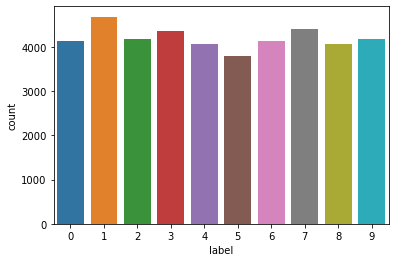

In [6]:
sns.countplot(x= y)

In [7]:
X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
X.shape

(42000, 784)

In [9]:
print(sqrt(784))

28.0


In [10]:
print(np.unique(y, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188],
      dtype=int64))


# Import Deep learning librairie

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Dropout,Flatten,Conv2D,MaxPool2D,LeakyReLU
from tensorflow.keras import backend,callbacks,initializers
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, 
                            f1_score,accuracy_score, precision_score, 
                             recall_score, roc_auc_score) 

# Preprocessing

In [13]:
def preprocessing(X,y,test_size,random_seed):
    # Normalisation
    X = X / 255.0
    # redimension des images
    X = X.values.reshape(X.shape[0], 28, 28,1)
    # One hot encoder
    Y = tf.keras.utils.to_categorical(y, num_classes = 10)
    # données test,train
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = test_size, random_state = random_seed)
    return X_train, X_test, y_train, y_test

# Training Test

In [14]:
X_train, X_test, y_train, y_test= preprocessing(X,y,0.1,2)

NumExpr defaulting to 8 threads.


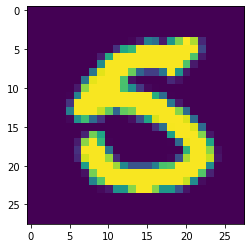

In [15]:
plt.imshow(X_train[4][:,:,0])

# CNN Model 

## CNN Model without data augmentation

In [16]:
input_shape = X_train.shape[1:]
print("Input shape: {}".format(input_shape))

Input shape: (28, 28, 1)


In [17]:
def CNN_architecture(input_shape):
    model=Sequential()

    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape = input_shape))
    model.add(LeakyReLU())
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
    model.add(LeakyReLU())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
    model.add(LeakyReLU())
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
    model.add(LeakyReLU())
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(256,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    return model

In [18]:
model = CNN_architecture(X_train.shape[1:])

In [19]:
# print(model.summary())

In [20]:
opt =tf.keras.optimizers.Adam(learning_rate=0.001)

C:\Users\mattb\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
def compiler(model,optimizer):
    return model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])  

In [22]:
compiler(model,opt)

In [23]:
early_stopping =  callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=3, # how many epochs to wait before stopping
    restore_best_weights=True,)

In [24]:
history = model.fit(X_train,y_train, validation_split=0.2,callbacks=early_stopping,batch_size=128, epochs=30)

Epoch 1/30
237/237 [==============================] - 69s 287ms/step - loss: 0.2915 - accuracy: 0.9076 - val_loss: 0.0641 - val_accuracy: 0.9817
Epoch 2/30
237/237 [==============================] - 68s 285ms/step - loss: 0.0725 - accuracy: 0.9775 - val_loss: 0.0490 - val_accuracy: 0.9858
Epoch 3/30
237/237 [==============================] - 69s 292ms/step - loss: 0.0493 - accuracy: 0.9841 - val_loss: 0.0413 - val_accuracy: 0.9876
Epoch 4/30
237/237 [==============================] - 71s 302ms/step - loss: 0.0422 - accuracy: 0.9861 - val_loss: 0.0443 - val_accuracy: 0.9868
Epoch 5/30
237/237 [==============================] - 68s 288ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0413 - val_accuracy: 0.9886


## Model with Data Augmentation

In [25]:
model2 = CNN_architecture(X_train.shape[1:])

In [26]:
def DataGen():
    # With data augmentation to prevent overfitting (accuracy 0.99286)
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images 
    return datagen

In [27]:
data_aug = DataGen().flow(X_train,y_train)

In [28]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

C:\Users\mattb\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [29]:
def compiler(model,optimizer):
    return model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])    

In [30]:
compiler(model2,opt)

In [31]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [32]:
history = model2.fit(data_aug, epochs = 30, validation_data = (X_test,y_test)
                              , steps_per_epoch=X_train.shape[0] // 128
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
295/295 [==============================] - 28s 91ms/step - loss: 0.6984 - accuracy: 0.7785 - val_loss: 0.1619 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 2/30
295/295 [==============================] - 27s 91ms/step - loss: 0.2098 - accuracy: 0.9387 - val_loss: 0.1506 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 3/30
295/295 [==============================] - 27s 92ms/step - loss: 0.1674 - accuracy: 0.9524 - val_loss: 0.1627 - val_accuracy: 0.9510 - lr: 0.0010
Epoch 4/30
295/295 [==============================] - 27s 91ms/step - loss: 0.1277 - accuracy: 0.9604 - val_loss: 0.0526 - val_accuracy: 0.9852 - lr: 0.0010
Epoch 5/30
295/295 [==============================] - 27s 91ms/step - loss: 0.1076 - accuracy: 0.9676 - val_loss: 0.0538 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 6/30
295/295 [==============================] - 26s 87ms/step - loss: 0.1010 - accuracy: 0.9718 - val_loss: 0.0433 - val_accuracy: 0.9874 - lr: 0.0010
Epoch 7/30
295/295 [==============================] - 27s 

# Model Evaluation

In [33]:
def predict(model):
    y_predict = model.predict(X_test)
    Y_pred = np.argmax(y_predict,axis = 1)
    Y_true = np.argmax(y_test,axis = 1)
    return Y_pred,Y_true,y_predict    

In [34]:
Y_pred,Y_true,y_predict = predict(model)

In [35]:
Y_pred2,Y_true2,y_predict2 = predict(model2)

## Classification Report

### model without data augmentation

In [36]:
print(classification_report(Y_true, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       411
           1       0.99      0.98      0.99       485
           2       0.99      0.99      0.99       403
           3       0.97      0.99      0.98       418
           4       0.96      0.99      0.98       461
           5       0.98      0.98      0.98       372
           6       0.98      0.99      0.99       413
           7       0.98      0.99      0.99       446
           8       0.98      0.98      0.98       382
           9       0.99      0.94      0.97       409

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200



### model with data augmentation

In [37]:
print(classification_report(Y_true2, Y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       485
           2       1.00      1.00      1.00       403
           3       0.99      1.00      0.99       418
           4       0.99      0.99      0.99       461
           5       1.00      0.99      0.99       372
           6       0.99      1.00      0.99       413
           7       1.00      1.00      1.00       446
           8       0.99      0.99      0.99       382
           9       0.99      0.99      0.99       409

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200



## Confusion Matrix

### without data augmentation

<AxesSubplot:>

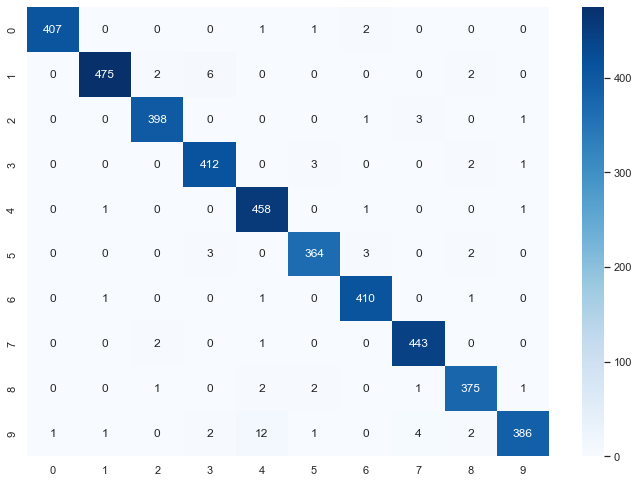

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(confusion_matrix(Y_true, Y_pred), annot=True, cmap='Blues', fmt='g')

### with data augmentation

<AxesSubplot:>

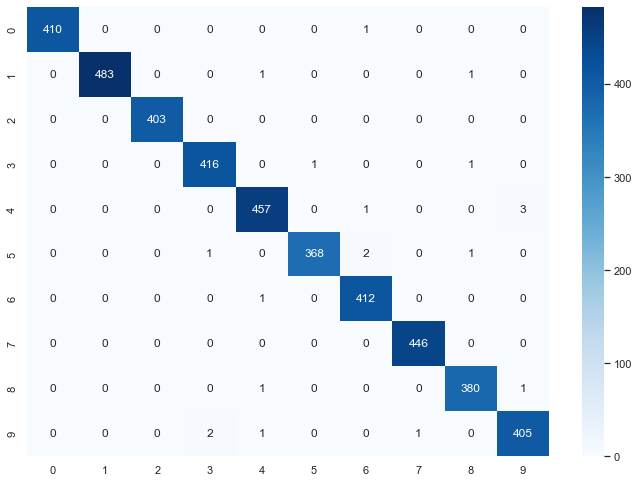

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(confusion_matrix(Y_true2, Y_pred2), annot=True, cmap='Blues', fmt='g')

## Learning Curve

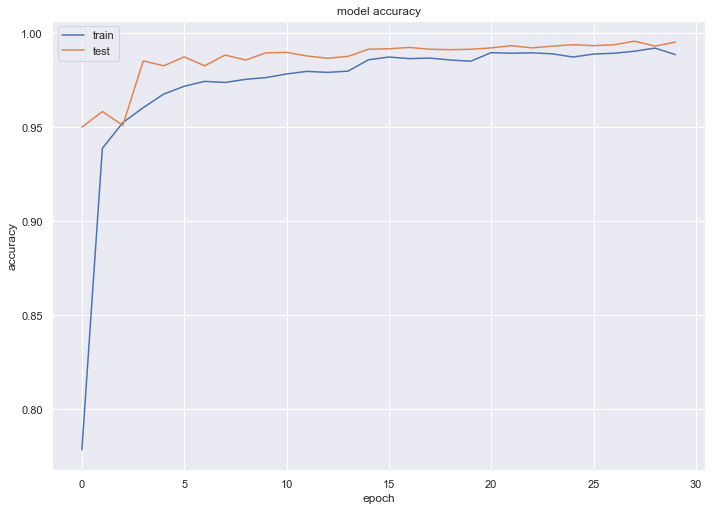

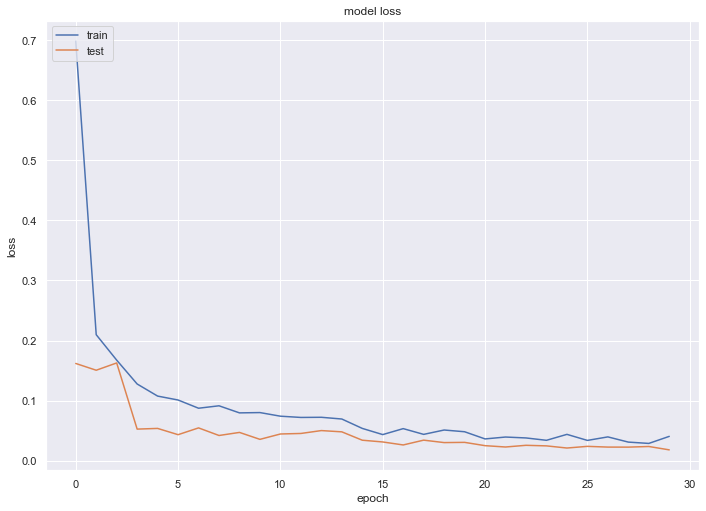

In [40]:
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('4.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('4.png')
plt.show()

## Examen des erreurs 

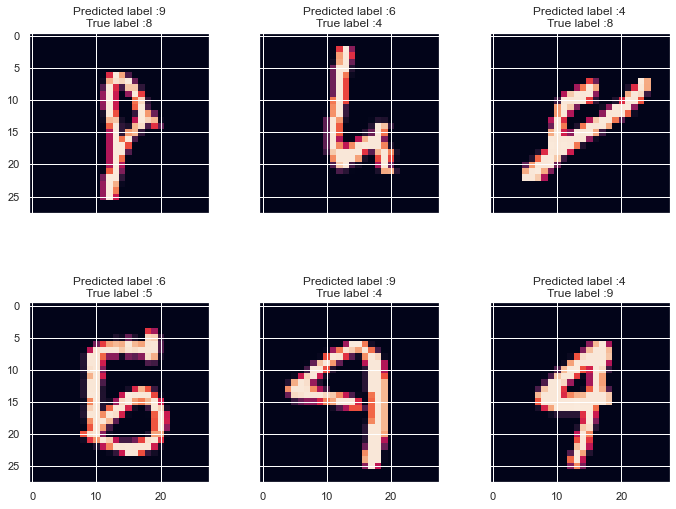

In [41]:
# Observons les erreurs du modèle

# Les erreur sont la difference entre les valeurs de prediction et les vrais valeurs 
errors = (Y_pred2 - Y_true2 != 0)

Y_pred_classes_errors = Y_pred2[errors]
Y_pred_errors = y_predict2[errors]
Y_true_errors = Y_true2[errors]
X_val_errors = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    plt.subplots_adjust(hspace = 0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

sorted_dela_errors = np.argsort(delta_pred_true_errors)

most_important_errors = sorted_dela_errors[-6:]

display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

# Save model

In [42]:
from tensorflow.keras.models import save_model, load_model

In [44]:
save_model(model2,'model_datagen2.h5')